#### Análisis y Procesamiento de Señales

---

# Tarea Semanal N°8
## *Filtrado digital lineal de ECG*

#### Augusto Colugnatti

---

## Introducción teórica

El objetivo de esta tarea consiste en el diseño e implementación de distintos tipos de filtros para una señal de ECG (electrocardiograma) dada, la cual no solo cuenta con la información que se desea obtener a partir de este ensayo, sino que también presenta ruido e interferencias ocasionadas por múltiples causas.

La prueba de ECG registra la actividad eléctrica del corazón por un conjunto de electrodos adheridos a la piel. A partir de ella, puede evaluarse la salud general del órgano y detectar arritmias, es decir, problemas relacionados con un ritmo cardíaco irregular, etc. Para una correcta interpretación de los resultados, y posterior diseño de filtros, es de interés comprender los siguientes comportamientos que caracterizan a las etapas del latido cardíaco.

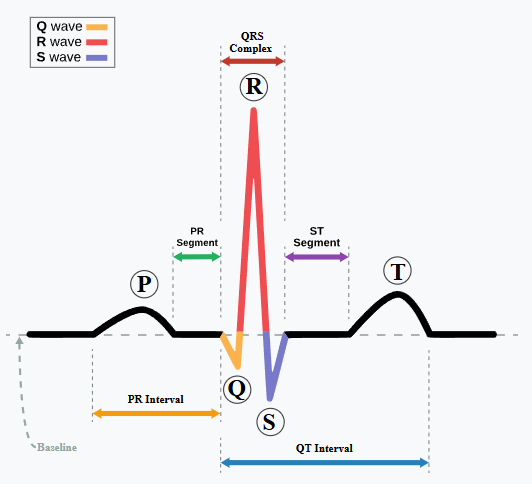

→ **Onda P** : representa el impulso eléctrico inicial que produce la contracción de las auriculas (cavidades donde se recibe la sangre de los vasos sanguineos), enviando la sangre hacia los ventrículos, ubicados debajo.

→ **Segmento PQ** : periodo de relajación muscular que da el tiempo suficiente para que la totalidad de la sangre llegue a los ventrículos. De no producirse esta demora, parte de la sangre proveniente de las auriculas no sería bombeada, o lo que es peor, sería devuelta a ellos, provocando daños en el corazón.

→ **Complejo QRS** : se produce un fuerte impulso eléctrico que contrae los ventrículos para bombear la sangre a todo el cuerpo. Este pico, visiblemente más alto y rápido, pone de manifiesto la necesidad de una contracción uniforme de todo el músculo, que al ser más grande que las aurículas, necesita a su vez de un mayor estímulo.

→ **Onda T** : onda suave que representa la preparación de los ventrículos previa a un nuevo latido. Se da por una pequeña actividad eléctrica que los lleva a su estado de reposo.

---

### ¿Qué es un filtro?

Un filtro es un dispositivo o algoritmo que trabaja sobre una señal analógica o digital, permitiendo el paso o bloqueo de las diferentes frecuencias que la componen. Un buen filtro resulta inocuo en banda de paso (frecuencias que deseo mantener) y de máxima atenuación en banda de rechazo (frecuencias que deseo descartar).

En este caso, dado que se está tratando con una señal digital, se utilizarán filtros también digitales, los cuales se caracterizan según su ecuación en diferencias (versión discreta de las ecuaciones diferenciales) de la pinta

\begin{equation}
y[n] = \sum_{k=0}^{M} b_k \cdot x[n-k] - \sum_{k=1}^{N} a_k \cdot y[n-k]
\end{equation}

#### **Filtros tipo IIR**

Los filtros IIR vienen a ser la contraparte digital de los filtros analógicos. Estos buscan emular su comportamiento mediante algoritmos, actuando sobre las muestras de señales digitales. Se caracterizan por una ecuación en diferencias, de carácter recursivo, que, ante un impulso, responde con una señal de naturaleza infinita. Esto imposibilita una respuesta de fase lineal, por lo que las frecuencias serán demoradas de manera no uniforme. Como resultado, la envolvente de la señal de salida puede resultar distorsionada, dando una interpretación errónea de la información. En cuanto a sus aspectos positivos, son computacionalmente más baratos que los filtros tipo FIR.

Los métodos de diseño utilizados consisten en hallar una respuesta de módulo que aproxime a un filtro ideal, es decir, a una cajita. Por lo tanto, los filtros IIR se clasifican según su función de aproximación y su orden. A mayor orden, el filtro responderá con bandas de transición más angostas, a costa de un mayor costo computacional. Algunos de los modelos clásicos para dar con esta aproximación son los siguientes:

NOTA: *un filtro tipo Brickwall (una cajita) es, en la práctica, imposible de realizar, pues ese salto infinitesimal en las frecuencias de corte implica una respuesta temporal infinita.*

→ **Butterworth** (caso particular dentro de las aproximaciones de *Máxima Planicidad*)

Caracterizado por tener una banda de paso sin ripple, es decir, sin oscilaciones (máximamente plana). Su transición a la banda de rechazo se da en forma monótona decreciente. En la región de rechazo, atenúa con una pendiente...

→ **Chebyshev**

A diferencia del anterior, su banda de paso sí admite cierto ripple en pos de, para un mismo orden, una transición más abrupta. Resulta útil en caso de querer filtrar dos frecuencias muy cercanas, si es que me puedo permitir algo de distorsión de amplitud a la salida.

→ **Cauer**

En este caso, su respuesta es equiripple tanto en banda de paso como en banda de rechazo. Sin embargo, como su transición se da rápidamente, resulta ser la más selectiva de todas para un mismo orden. Por contraparte, su respuesta de fase resulta ser extremadamente alineal, lo que se traduce en una gran distorsión a la salida del filtro.

#### **Filtros tipo FIR**

Los filtros FIR cuentan con una respuesta al impulso finita, pues normalmente no cuentan con recursividad alguna, y sus salidas solos dependen de las entradas pasadas. En caso de existir cierta retroalimentación, dicha respuesta puede aún extinguirse en caso de que su ecuación en diferencias lo permita. Esta naturaleza finita en la respuesta al impulso permite que admita algún tipo de simetría, ya sea par o impar, lo que implica que el filtro cuente con una respuesta de fase lineal, y por lo tanto, una demora constante para todas las frecuencias. Esto es un fuerte punto a favor, pues se preserva la envolvente de la señal, sino simplemente demorada. Sin embargo, a diferencia de los filtros tipo IIR, son computacionalmente más caros.

Los métodos para llegar a estos filtros se basan en hallar los coeficientes $b_k$ de su ecuación en diferencias, o lo que es lo mismo, hallar su respuesta al impulso. Los me´todos implementados son los siguientes:

→ **Método de ventanas**

Como se mencionó anteriormente, filtrar con un Brickwall produce una respuesta al impulso en el dominio del tiempo infinita. Como computacionalmente no puedo hallar infinitos coeficientes, se trunca la respuesta. Esta decisión implica tener un filtro distorsionado, con excesivo ripple. Para evitar esto se opta por, en lugar de truncar la respuesta, superponerla con una ventana que suavice sus extremos, disminuyendo en gran medida el ripple del filtro. La ventana a utilizar dependerá de cuánto ripple estoy dispuesto a asumir, y qué tan abrupta requiero que sea la transición.

→ **Método de cuadrados mínimos**

En una primera instancia, se define una respuesta del filtro deseado $D_{(\Omega)}$ (normalmente se establece el Brickwall). Luego, se buscan los coeficientes que minimicen la suma de los errores cuadráticos medios entre esta y la respuesta real del filtro $H_{R(\Omega)}$, para todas las frecuencias $\Omega$ (frecuencia angular normalizada de 0 a $\pi$). Esto da como resultado una solución algebráica cerrada, lo que garantiza la convergencia del método. Como lo que se busca minimizar es el error cuadrático medio, las regiones más alejadas a la frecuencia de corte pueden tener un error mayor. Una posible solución (en caso de ser considerado este un problema) consta en ponderar las bandas de frecuencias donde quiero que el algortimo se enfoque en disminuir dicho error.

→ **Método de Parks - Mc.Clellan**

A diferencia del método anterior, este busca minimizar el error máximo entre la respuesta deseada y la respuesta cuyos coeficientes quiero hallar, indicando las bandas de frecuencia de interés. Se trata de un algoritmo iterativo que redefine los coeficientes calculados una y otra vez hasta que las frecuencias con error máximo ya no varíen, o bien el error máximo se encuentre acotado por un valor establecido. De forma similar a *cuadrados mínimos*, las distintas bandas asignadas pueden ponderarse según requiera una mayor o menor exigencia. Es el método que mejor cumple con la plantilla de diseño deseada, para un mínimo orden. Sin embargo, al tratarse de un método iterativo, no tiene garantizada la convergencia.

---

## Desarrollo

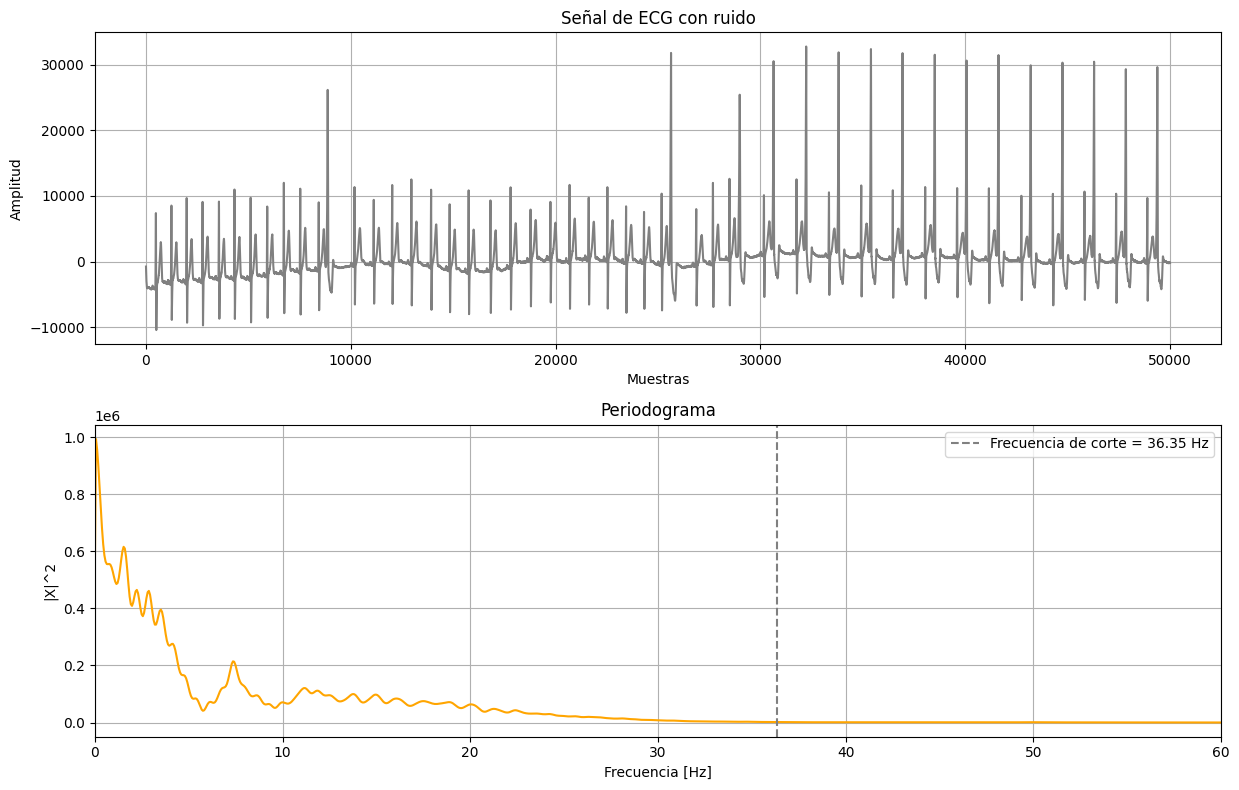

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from numpy.fft import fft
import scipy.signal as sp
import scipy.signal.windows as window
import scipy.stats as st
import scipy.io as sio
from pytc2.sistemas_lineales import plot_plantilla

# ------------------------------- Señal de ECG con ruido ------------------------------- #

fs_ECG = 1000

# ECG = sio.whosmat ('./ECG_TP4.mat') # devuelve una lista de variables dentro del archivo .mat (MATLAB)
mat_struct = sio.loadmat ('./ECG_TP4.mat')
# print("Variables encontradas en el archivo .mat:", mat_struct.keys()) # esto muestra las variables dentro del archivo .mat (lo miro desde el explorador de variables)

ecg_one_lead = mat_struct ['ecg_lead'].ravel() # ECG con ruido

hb_1 = mat_struct['heartbeat_pattern1']
hb_2 = mat_struct['heartbeat_pattern2']

ECG_cr = ecg_one_lead[0:50000].ravel()

N_ECG_cr = len (ECG_cr)

df_ECG_cr = fs_ECG / N_ECG_cr
nn_ECG_cr = np.arange (N_ECG_cr)

promedios_ECG_cr = 16
nperseg_ECG_cr = N_ECG_cr // promedios_ECG_cr

ff_ECG_cr, per_ECG_cr = sp.welch (ECG_cr, nfft = 5*nperseg_ECG_cr, fs = fs_ECG, nperseg = nperseg_ECG_cr, window = 'flattop')

energia_acum_cr = np.cumsum (per_ECG_cr)
energia_acum_cr_norm = energia_acum_cr / energia_acum_cr[-1]
corte_ECG_cr = energia_acum_cr_norm[-1] * 0.995
indice_corte_cr = int (np.where (energia_acum_cr_norm >= corte_ECG_cr)[0][0])
frec_corte_cr = ff_ECG_cr[indice_corte_cr]

plt.figure (figsize=(12.5, 8))

plt.subplot (2, 1, 1)
plt.plot (nn_ECG_cr, ECG_cr, color='gray')
# plt.plot (ff_ECG_cr, 10*np.log10(np.abs(per_ECG_cr))) # representación en dB
plt.title ("Señal de ECG con ruido")
plt.ylabel ("Amplitud")
plt.xlabel ("Muestras")
plt.grid (True)

plt.subplot (2, 1, 2)
plt.plot (ff_ECG_cr, per_ECG_cr, color='orange')
plt.axvline (frec_corte_cr, linestyle='--', color='gray', label=f'Frecuencia de corte = {frec_corte_cr:.2f} Hz')
plt.title ("Periodograma")
plt.ylabel ("|X|^2")
plt.xlabel ("Frecuencia [Hz]")
plt.grid (True)
plt.legend ()
plt.xlim (0, 60)

plt.tight_layout()
plt.show()

Los parámetros para el diseño de la plantilla surgen de analizar cuáles son las frecuencias que se deban atenuar (aquellas generadas por ruido, o que simplemente no me interesan) y cuáles no. Es decir, quiero un filtro con la mayor atenuación posible en banda de rechazo, y que resulte inocuo en banda de paso. Para identificar dichas frecuencias, debe observarse la envolvente de la señal y determinar las regiones afectadas por baja y alta frecuencia. Como punto de partida, se buscan las oscilaciones más "lentas" de línea de base para dar con las bajas frecuencias: analizando estos movimientos se observan periodos extremos de unas 10000 muestras (0.1Hz), hasta otros de, aproximadamente, 16000 (62.5mHz). Tomando la mayor de ellas, establezco una frecuencia de corte de 0.1Hz. Estas frecuencias se intepretan como interferencia, pues suelen estar relacionadas con movimientos del paciente, su respiración, un mal contacto de los electrodos, etc. Por otro lado, en cuanto a las altas frecuencias, puedo eliminar fácilmente aquellas que se encuentren por encima de la frecuencia de corte al estimar el ancho de banda efectivo de la señal. Considérese también la frecuencia eléctrica de la red a la cual está conectada el equipo, posiblemente de unos 50 o 60Hz. Sin embargo, se encuentra por encima del ancho de banda estimado, unos 36.35Hz, por lo que esta cota inferior será la que tome como corte. 

In [6]:
# --------------------------------------------------- Diseño de plantilla --------------------------------------------------- #

fs = fs_ECG

wp = [0.8, 35] # frecuencia de corte/paso (rad/seg)
ws = [0.1, 40] # frecuencia de stop/detenida (rad/seg)

ripple = 1
atte = 40

# plot_plantilla(filter_type = 'bandpass', fpass = wp, ripple = ripple, fstop = ws, attenuation = atte, fs = fs)

In [7]:
# ----------------------------------------------- 1° filtro IIR (Butterworth) ----------------------------------------------- #

mat_sos_1 = sig.iirdesign (wp = wp, ws = ws, gpass = ripple/2, gstop = atte/2, analog = False, ftype = 'butter', output = 'sos', fs = fs)
mat_sos_11 = sig.iirdesign (wp = wp, ws = ws, gpass = ripple, gstop = atte, analog = False, ftype = 'butter', output = 'sos', fs = fs)
# me guardo un filtro con los parámetros de ripple y atenuación originales para su posterior análisis (ver Conclusiones)

w_1, h_1 = sig.freqz_sos (sos = mat_sos_1, worN=np.logspace(-2, 1.9, 1000), fs = fs)
w_11, h_11 = sig.freqz_sos (sos = mat_sos_11, worN=np.logspace(-2, 1.9, 1000), fs = fs)
w_rad_1 = w_1 / (fs*np.pi/2) # pues el omega devuelto tiene unidades de rad/muestra y va de [0, pi), lo normalizo por ws en nyquist

ecg_filt_1 = sig.sosfiltfilt (mat_sos_1, ecg_one_lead)

# ------------------------------------------------- 2° filtro IIR (Cheby I) ------------------------------------------------- #

mat_sos_2 = sig.iirdesign (wp = wp, ws = ws, gpass = ripple/2, gstop = atte/2, analog = False, ftype = 'cheby1', output = 'sos', fs = fs)
mat_sos_22 = sig.iirdesign (wp = wp, ws = ws, gpass = ripple, gstop = atte, analog = False, ftype = 'cheby1', output = 'sos', fs = fs)

w_2, h_2 = sig.freqz_sos (sos = mat_sos_2, worN=np.logspace(-2, 1.9, 1000), fs = fs)
w_22, h_22 = sig.freqz_sos (sos = mat_sos_22, worN=np.logspace(-2, 1.9, 1000), fs = fs)
w_rad_2 = w_2 / (fs*np.pi/2)

ecg_filt_2 = sig.sosfiltfilt (mat_sos_2, ecg_one_lead)

# -------------------------------------------------- 3° filtro IIR (Cauer) -------------------------------------------------- #

mat_sos_3 = sig.iirdesign (wp = wp, ws = ws, gpass = ripple/2, gstop = atte/2, analog = False, ftype = 'cauer', output = 'sos', fs = fs)
mat_sos_33 = sig.iirdesign (wp = wp, ws = ws, gpass = ripple, gstop = atte, analog = False, ftype = 'cauer', output = 'sos', fs = fs)

w_3, h_3 = sig.freqz_sos (sos = mat_sos_3, worN=np.logspace(-2, 1.9, 1000), fs = fs)
w_33, h_33 = sig.freqz_sos (sos = mat_sos_33, worN=np.logspace(-2, 1.9, 1000), fs = fs)
w_rad_3 = w_3 / (fs*np.pi/2)

ecg_filt_3 = sig.sosfiltfilt (mat_sos_3, ecg_one_lead)

Con el objetivo de eliminar por completo la distorsión de fase, se optó por realizar un filtrado bidireccional con *sig.sosfiltfilt*. Esto compensa la demora generada al filtrar en un solo sentido, filtrando nuevamente pero en sentido contrario. Los parámetros de ripple y atenuación se redefinieron a la mitad, pues filtrar dos veces implica salir con estos valores duplicados.

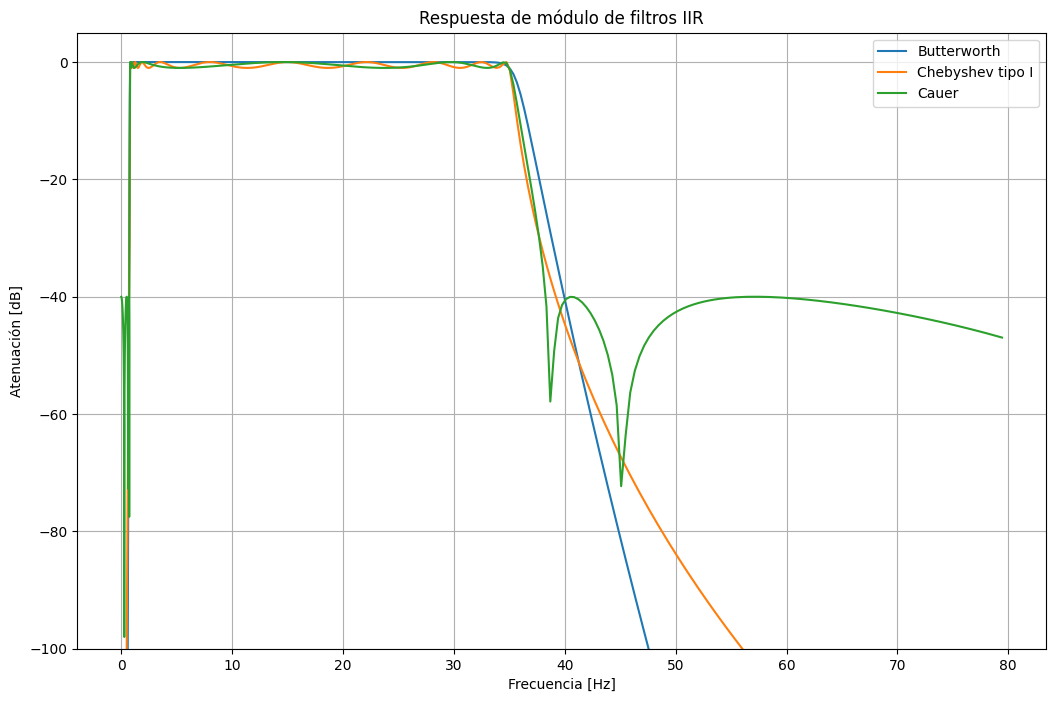

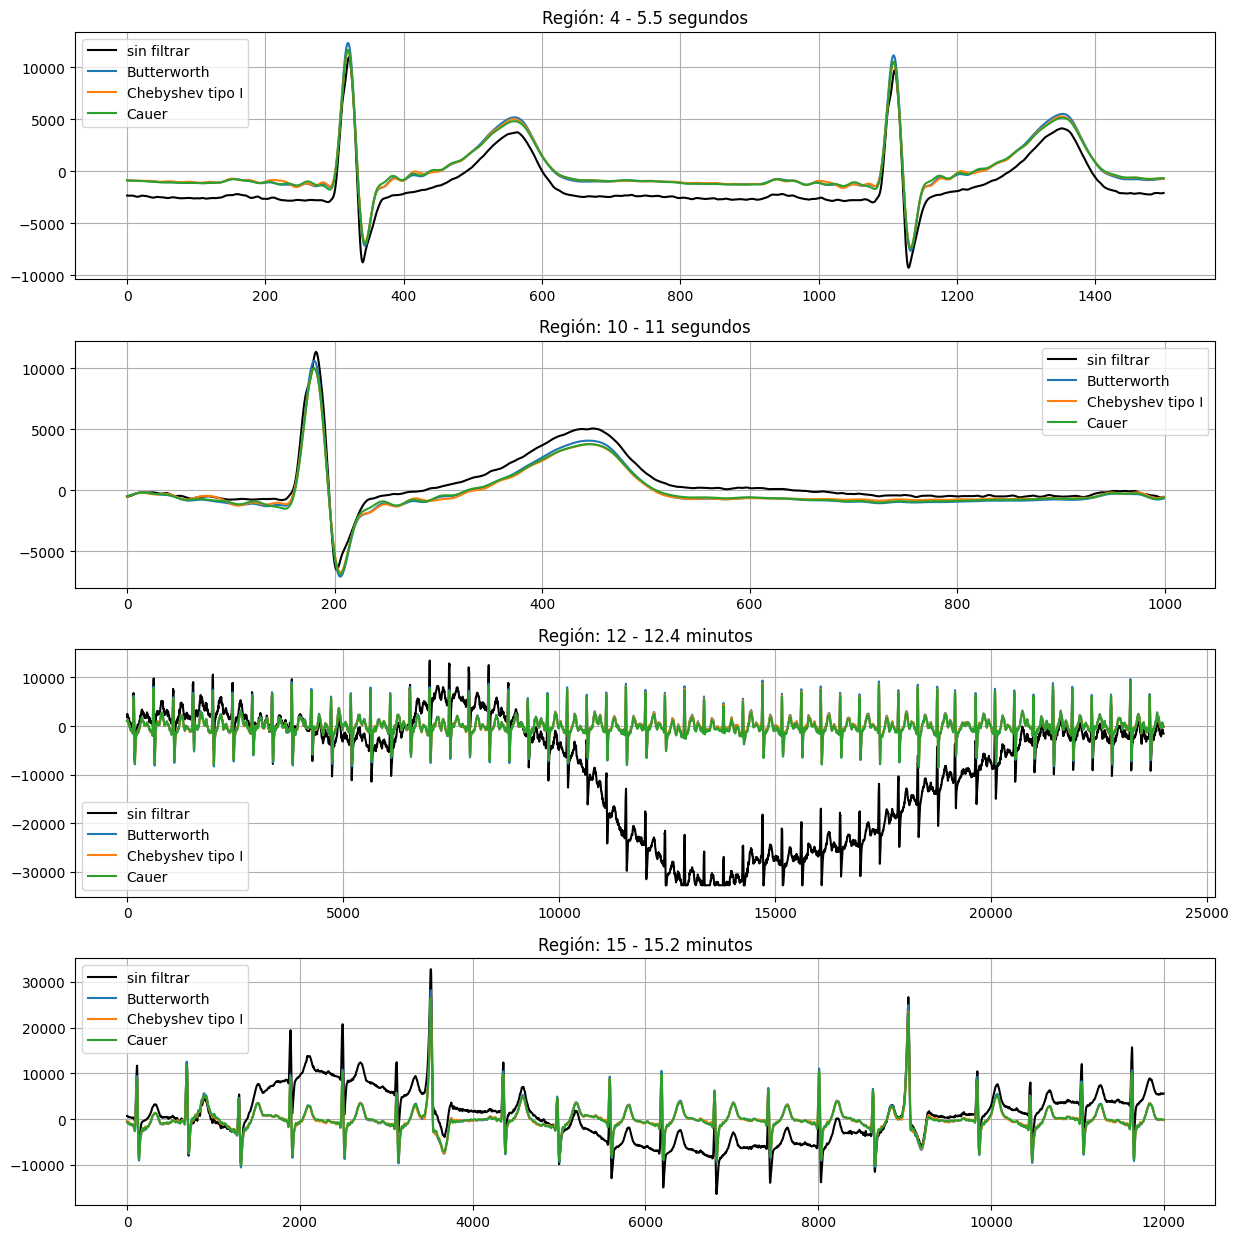

In [14]:
# ------------------------------------------------ Comparación de filtros IIR ------------------------------------------------ #

plt.figure (figsize=(12.5, 8))

plt.plot (w_11, 20*np.log10(np.abs(h_11)), label='Butterworth')
plt.plot (w_22, 20*np.log10(np.abs(h_22)), label='Chebyshev tipo I')
plt.plot (w_33, 20*np.log10(np.abs(h_33)), label='Cauer')
plt.title ('Respuesta de módulo de filtros IIR')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('Atenuación [dB]')
plt.ylim (-100, 5)
plt.legend ()
plt.grid (True)

plt.figure (figsize=(12.5, 12.5))

plt.subplot (4, 1, 1)
plt.plot (ecg_one_lead[4000:5500], label='sin filtrar', color='black')
plt.plot (ecg_filt_1[4000:5500], label='Butterworth')
plt.plot (ecg_filt_2[4000:5500], label='Chebyshev tipo I')
plt.plot (ecg_filt_3[4000:5500], label='Cauer')
plt.title ('Región: 4 - 5.5 segundos')
plt.grid (True)
plt.legend ()

plt.subplot (4, 1, 2)
plt.plot (ecg_one_lead[10000:11000], label='sin filtrar', color='black')
plt.plot (ecg_filt_1[10000:11000], label='Butterworth')
plt.plot (ecg_filt_2[10000:11000], label='Chebyshev tipo I')
plt.plot (ecg_filt_3[10000:11000], label='Cauer')
plt.title ('Región: 10 - 11 segundos')
plt.grid (True)
plt.legend ()

plt.subplot (4, 1, 3)
plt.plot (ecg_one_lead[720000:744000], label='sin filtrar', color='black')
plt.plot (ecg_filt_1[720000:744000], label='Butterworth')
plt.plot (ecg_filt_2[720000:744000], label='Chebyshev tipo I')
plt.plot (ecg_filt_3[720000:744000], label='Cauer')
plt.title ('Región: 12 - 12.4 minutos')
plt.grid (True)
plt.legend ()

plt.subplot (4, 1, 4)
plt.plot (ecg_one_lead[900000:912000], label='sin filtrar', color='black')
plt.plot (ecg_filt_1[900000:912000], label='Butterworth')
plt.plot (ecg_filt_2[900000:912000], label='Chebyshev tipo I')
plt.plot (ecg_filt_3[900000:912000], label='Cauer')
plt.title ('Región: 15 - 15.2 minutos')
plt.grid (True)
plt.legend ()

plt.tight_layout ()
plt.show ()

In [9]:
# ------------------------------------------------ 1° filtro FIR (Ventanas) ------------------------------------------------ #

frecs_1 = [0, 0.1, 0.8, 35, 40, fs//2] # firwin2 me pide que empiece en 0 y termine en fs/2
ganancia_deseada_1 = [0, 0, 1, 1, 0, 0]
# con esto doy los puntos que va a tratar de interpolar el filtro
cant_coef_1 = 2400
retardo_1 = (cant_coef_1 - 1) // 2

fir_win_rect = sig.firwin2 (numtaps = cant_coef_1, freq = frecs_1, gain = ganancia_deseada_1, window = 'boxcar', fs = fs, nfreqs = int((np.ceil(np.sqrt(cant_coef_1*2)**2))-1))
w_4, h_4 = sig.freqz (b = fir_win_rect, worN=np.logspace(-2, 2, 1000), fs = fs)

ecg_filt_4 = sig.lfilter (b = fir_win_rect, a = 1, x = ecg_one_lead)

# -------------------------------------------- 2° filtro FIR (Cuadrados mínimos) -------------------------------------------- #

frecs_2 = [0, 0.4, 0.8, 35, 35.4, fs/2] # acá se "predistorsionó la plantilla" para dar más holgura a las verdaderas
                                        # frecuencias de la plantilla (alternativa para no aumentar coeficientes)
ganancia_deseada_2 = [0, 0, 1, 1, 0, 0]
peso = [2, 1, 12] # acá tuve que "pesar", darle más importancia, a la transición de baja porque no cumplía con la plantilla
cant_coef_2 = 2501 # firls me pide una cantidad par, pues solo diseña filtros de tipo I
retardo_2 = (cant_coef_2 - 1) // 2

fir_ls = sig.firls (numtaps = cant_coef_2, bands = frecs_2, desired = ganancia_deseada_2, weight = peso, fs = fs)
w_5, h_5 = sig.freqz (b = fir_ls, worN=np.logspace(-2, 2, 2000), fs = fs)

ecg_filt_5 = sig.lfilter (b = fir_ls, a = 1, x = ecg_one_lead)

# -------------------------------------------- 3° filtro FIR (Parks - McClellan) -------------------------------------------- #

frecs_3 = [0, 0.1, 0.8, 35, 35.7, fs/2] # para este método debo hacer "simétricas" las transiciones, sino no converge
ganancia_deseada_3 = [0, 1, 0] # Peaks-McClellan toma la ganancia de a sectores

cant_coef_3 = 2600
retardo_3 = (cant_coef_3 - 1) // 2

fir_pm = sig.remez (numtaps = cant_coef_3, bands = frecs_3, desired = ganancia_deseada_3, fs = fs)
w_6, h_6 = sig.freqz (b = fir_pm, worN=np.logspace(-2, 2, 2500), fs = fs)

ecg_filt_6 = sig.lfilter (b = fir_pm, a = 1, x = ecg_one_lead)

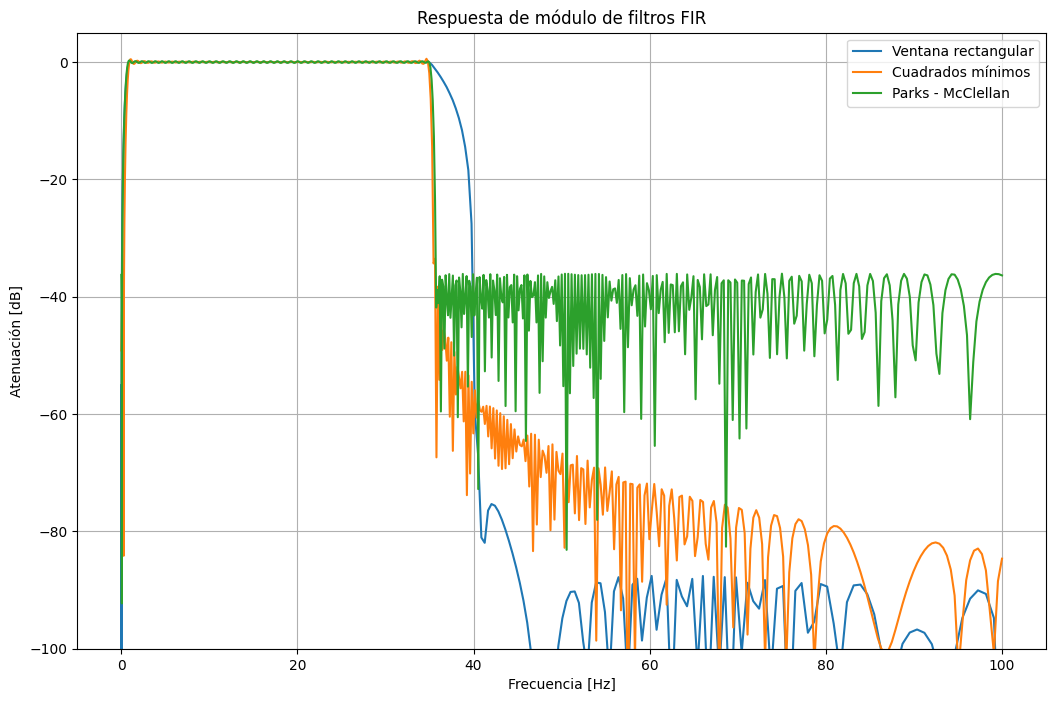

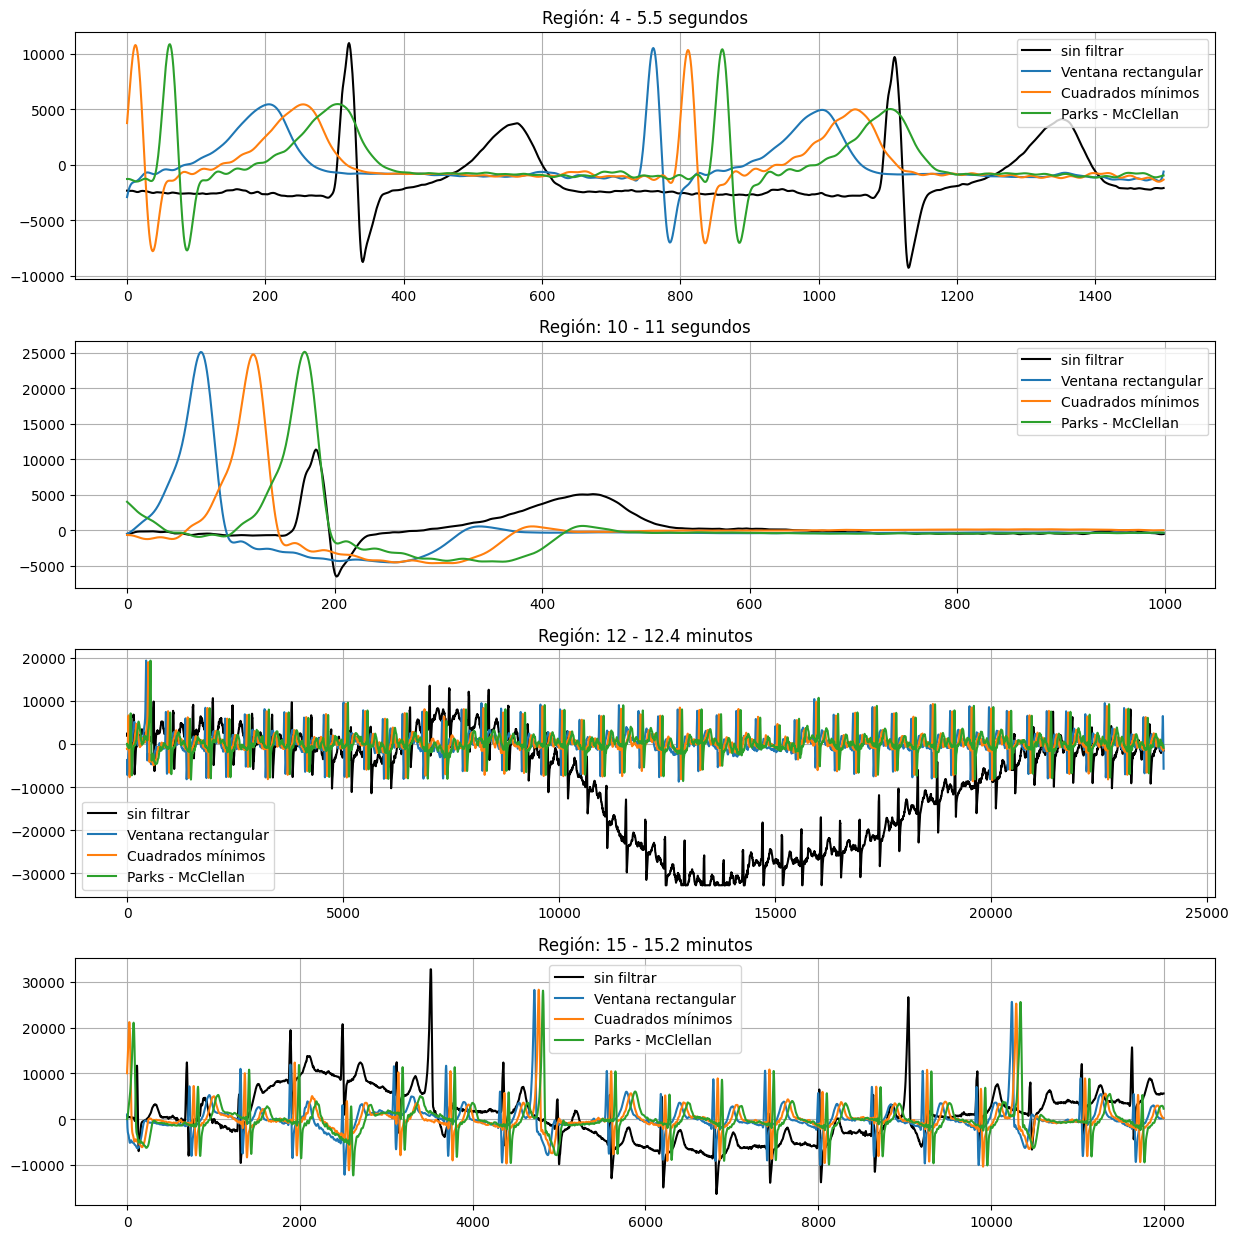

In [15]:
# ------------------------------------------------ Comparación de filtros FIR ------------------------------------------------ #

plt.figure (figsize=(12.5, 8))

plt.plot (w_4, 20*np.log10(np.abs(h_4)), label='Ventana rectangular')
plt.plot (w_5, 20*np.log10(np.abs(h_5)), label='Cuadrados mínimos')
plt.plot (w_6, 20*np.log10(np.abs(h_6)), label='Parks - McClellan')
plt.title ('Respuesta de módulo de filtros FIR')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('Atenuación [dB]')
plt.ylim (-100, 5)
plt.legend ()
plt.grid (True)

plt.figure (figsize=(12.5, 12.5))

plt.subplot (4, 1, 1)
plt.plot (ecg_one_lead[4000:5500], label='sin filtrar', color='black')
plt.plot (ecg_filt_4[4000:5500], label='Ventana rectangular')
plt.plot (ecg_filt_5[4000:5500], label='Cuadrados mínimos')
plt.plot (ecg_filt_6[4000:5500], label='Parks - McClellan')
plt.title ('Región: 4 - 5.5 segundos')
plt.grid (True)
plt.legend ()

plt.subplot (4, 1, 2)
plt.plot (ecg_one_lead[10000:11000], label='sin filtrar', color='black')
plt.plot (ecg_filt_4[10000:11000], label='Ventana rectangular')
plt.plot (ecg_filt_5[10000:11000], label='Cuadrados mínimos')
plt.plot (ecg_filt_6[10000:11000], label='Parks - McClellan')
plt.title ('Región: 10 - 11 segundos')
plt.grid (True)
plt.legend ()

plt.subplot (4, 1, 3)
plt.plot (ecg_one_lead[720000:744000], label='sin filtrar', color='black')
plt.plot (ecg_filt_4[720000:744000], label='Ventana rectangular')
plt.plot (ecg_filt_5[720000:744000], label='Cuadrados mínimos')
plt.plot (ecg_filt_6[720000:744000], label='Parks - McClellan')
plt.title ('Región: 12 - 12.4 minutos')
plt.grid (True)
plt.legend ()

plt.subplot (4, 1, 4)
plt.plot (ecg_one_lead[900000:912000], label='sin filtrar', color='black')
plt.plot (ecg_filt_4[900000:912000], label='Ventana rectangular')
plt.plot (ecg_filt_5[900000:912000], label='Cuadrados mínimos')
plt.plot (ecg_filt_6[900000:912000], label='Parks - McClellan')
plt.title ('Región: 15 - 15.2 minutos')
plt.grid (True)
plt.legend ()

plt.tight_layout ()
plt.show ()

---

## Conclusiones



#### Análisis de la respuesta de módulo de filtros IIR

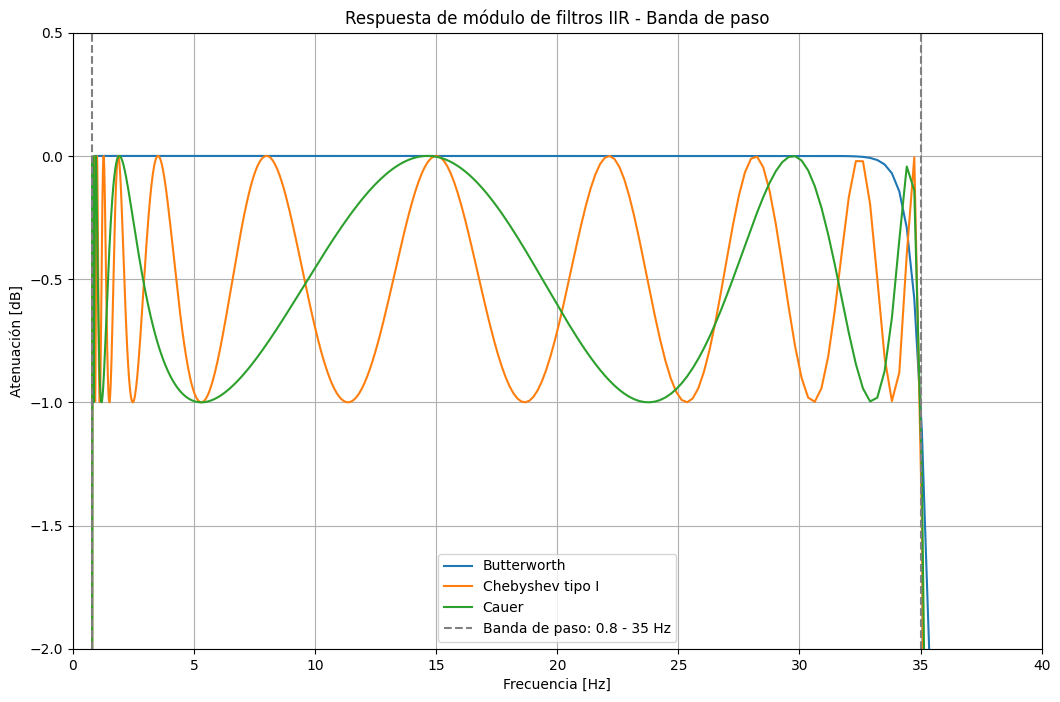

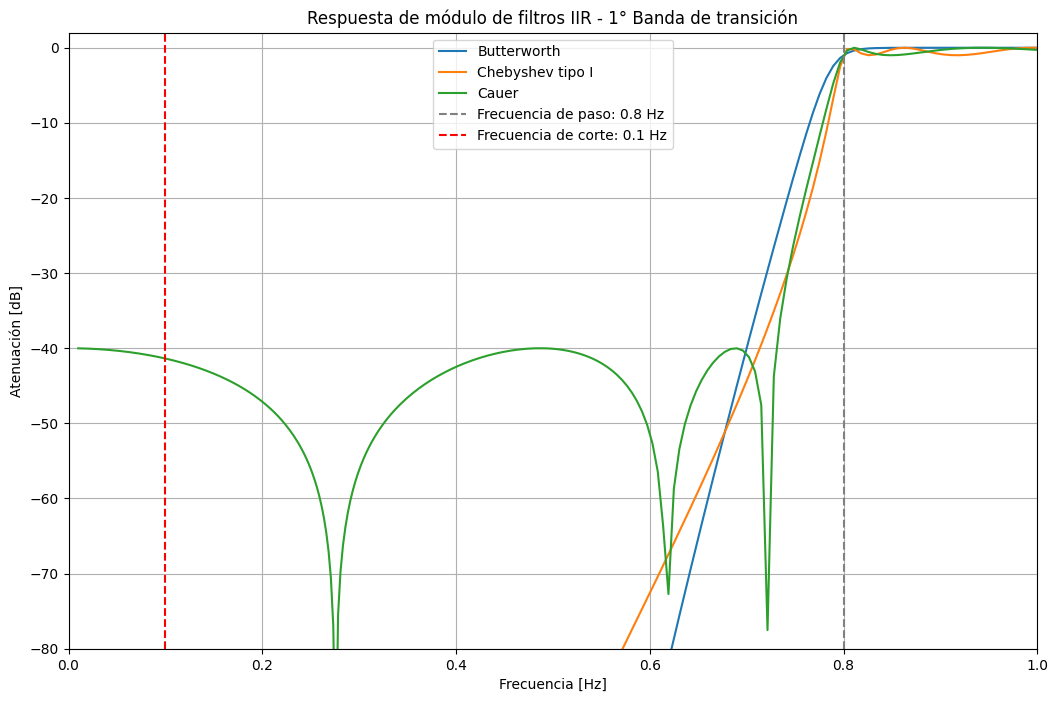

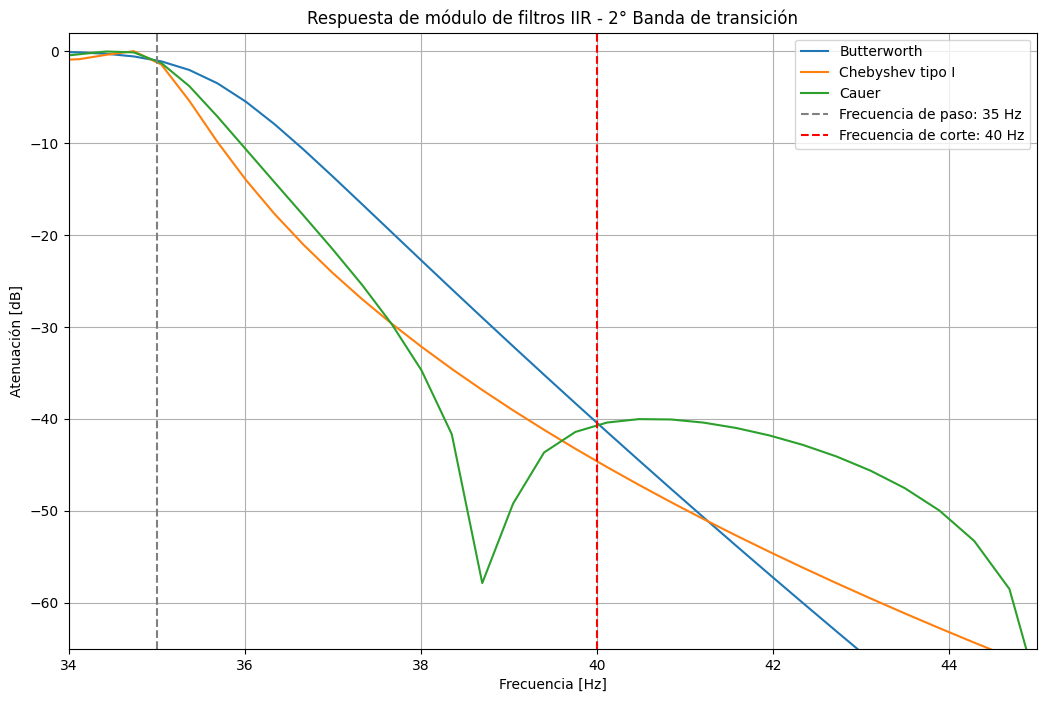

In [17]:
plt.figure (figsize=(12.5, 8))

plt.plot (w_11, 20*np.log10(np.abs(h_11)), label='Butterworth')
plt.plot (w_22, 20*np.log10(np.abs(h_22)), label='Chebyshev tipo I')
plt.plot (w_33, 20*np.log10(np.abs(h_33)), label='Cauer')
plt.axvline (0.8, ls='--', color='gray', label='Banda de paso: 0.8 - 35 Hz')
plt.axvline (35, ls='--', color='gray')
plt.title ('Respuesta de módulo de filtros IIR - Banda de paso')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('Atenuación [dB]')
plt.xlim (0, 40)
plt.ylim (-2, 0.5)
plt.legend ()
plt.grid (True)

plt.figure (figsize=(12.5, 8))

plt.plot (w_11, 20*np.log10(np.abs(h_11)), label='Butterworth')
plt.plot (w_22, 20*np.log10(np.abs(h_22)), label='Chebyshev tipo I')
plt.plot (w_33, 20*np.log10(np.abs(h_33)), label='Cauer')
plt.axvline (0.8, ls='--', color='gray', label='Frecuencia de paso: 0.8 Hz')
plt.axvline (0.1, ls='--', color='red', label='Frecuencia de corte: 0.1 Hz')
plt.title ('Respuesta de módulo de filtros IIR - 1° Banda de transición')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('Atenuación [dB]')
plt.xlim (0, 1)
plt.ylim (-80, 2)
plt.legend ()
plt.grid (True)

plt.figure (figsize=(12.5, 8))

plt.plot (w_11, 20*np.log10(np.abs(h_11)), label='Butterworth')
plt.plot (w_22, 20*np.log10(np.abs(h_22)), label='Chebyshev tipo I')
plt.plot (w_33, 20*np.log10(np.abs(h_33)), label='Cauer')
plt.axvline (35, ls='--', color='gray', label='Frecuencia de paso: 35 Hz')
plt.axvline (40, ls='--', color='red', label='Frecuencia de corte: 40 Hz')
plt.title ('Respuesta de módulo de filtros IIR - 2° Banda de transición')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('Atenuación [dB]')
plt.xlim (34, 45)
plt.ylim (-65, 2)
plt.legend ()
plt.grid (True)

En concordancia con lo mencionado en la introducción, se puede observar que en banda de paso, la única aproximación carente de ripple fue la de Butterworth, seguido por Cheby y Cauer que, si bien tienen una mayor oscilación, respectivamente, su ripple se encuentra acotado entre 0dB y -1dB, tal y como fue establecido en el parámetro *ripple*. 

En cuanto al filtrado de bajas frecuencias (ver 1° Banda de transición), por debajo de los 0.1Hz, es decir, un poco mayor a la frecuencia que se estimó el movimiento de línea de base, la mínima atenuación obtenida fue por la aproximación de Cauer, a unos -40dB, como indica la plantilla. Sin embargo, aunque esta misma mantiene cierto ripple durante la transición, también es la que transiciona más rápido una vez nos acercamos a la frecuencia de paso, permitiendo una mayor selectividad entre sus frecuencias vecinas. 

Observando el comportamiento a mayores frecuencias (ver 2° Banda de transición), las tres aproximaciones cumplen con precisión el paso por -1dB en los 35Hz, siendo Cheby la que inmediatamente atenúa con mayor velocidad, aunque, llegando a la región de rechazo, es superada por Cauer. En ambas bandas de rechazo, no obstante ligeramente separadas de la frecuencia de corte, la atenuación predominante resulta ser la de Butter, con una pendiente de -(20.N)dB/dec, siendo N el orden del filtro. 

De todas maneras, puesto que todas ellas cumplen con los requisitos de la plantilla diseñada, la elección de la aproximación a utilizar queda sujeta a las alteraciones que esté dispuesto a tolerar en la señal de salida. Es decir, si requiero de alta precisión en la amplitud de la señal, optaría por un Butter, con máxima planicidad en banda de paso, aunque con una transición más suave. Por el contrario, si requiero de una mayor selectividad y estoy dispuesto a tolerar algo de ripple en todas las bandas, Cauer sería una buena opción, pues al cumplir con los mínimos requisitos de la plantilla, su costo computacional también resulta ser menor.

#### Análisis de la respuesta de módulo de filtros FIR

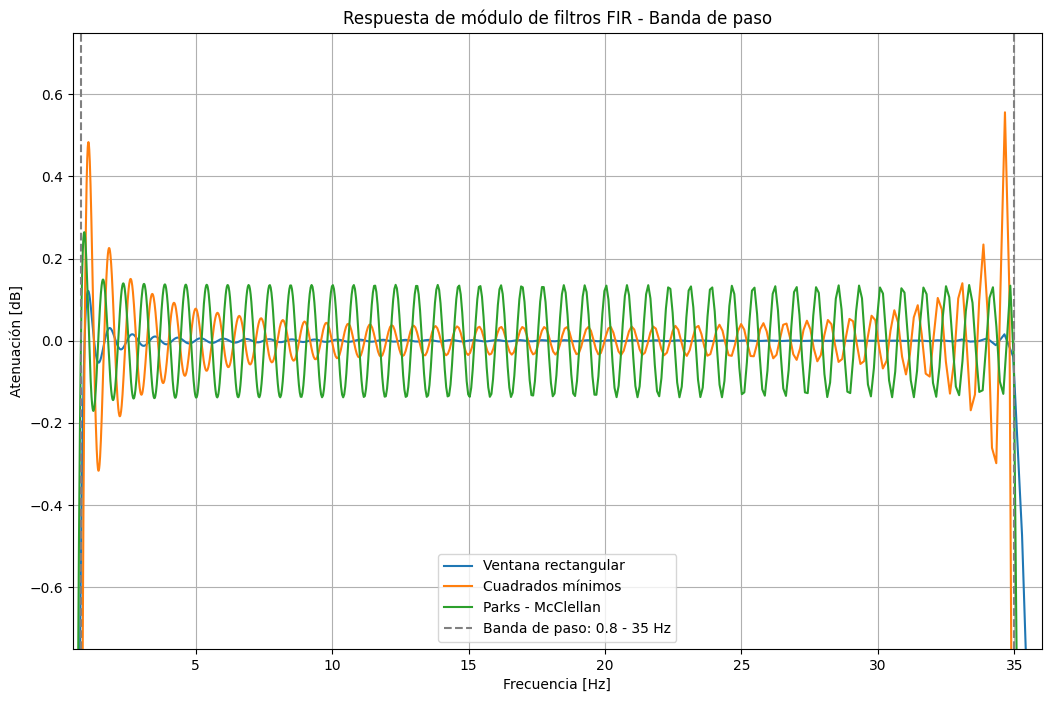

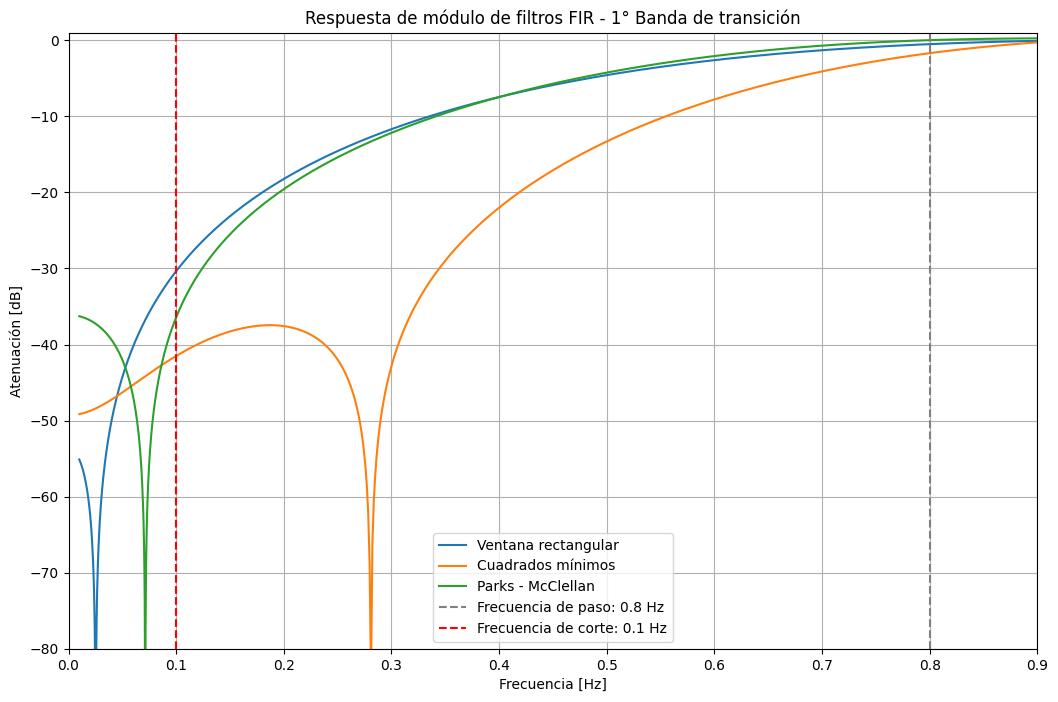

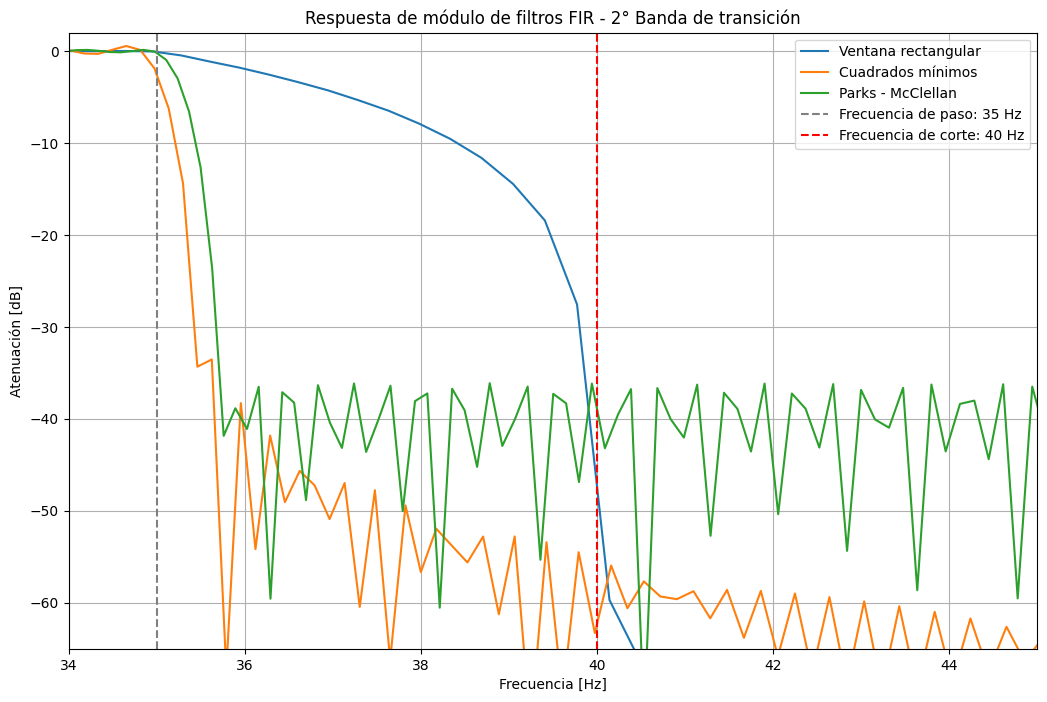

In [12]:
plt.figure (figsize=(12.5, 8))

plt.plot (w_4, 20*np.log10(np.abs(h_4)), label='Ventana rectangular')
plt.plot (w_5, 20*np.log10(np.abs(h_5)), label='Cuadrados mínimos')
plt.plot (w_6, 20*np.log10(np.abs(h_6)), label='Parks - McClellan')
plt.axvline (0.8, ls='--', color='gray', label='Banda de paso: 0.8 - 35 Hz')
plt.axvline (35, ls='--', color='gray')
plt.title ('Respuesta de módulo de filtros FIR - Banda de paso')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('Atenuación [dB]')
plt.ylim (-0.75, 0.75)
plt.xlim (0.5, 36)
plt.legend ()
plt.grid (True)

plt.figure (figsize=(12.5, 8))

plt.plot (w_4, 20*np.log10(np.abs(h_4)), label='Ventana rectangular')
plt.plot (w_5, 20*np.log10(np.abs(h_5)), label='Cuadrados mínimos')
plt.plot (w_6, 20*np.log10(np.abs(h_6)), label='Parks - McClellan')
plt.axvline (0.8, ls='--', color='gray', label='Frecuencia de paso: 0.8 Hz')
plt.axvline (0.1, ls='--', color='red', label='Frecuencia de corte: 0.1 Hz')
plt.title ('Respuesta de módulo de filtros FIR - 1° Banda de transición')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('Atenuación [dB]')
plt.ylim (-80, 1)
plt.xlim (0, 0.9)
plt.legend ()
plt.grid (True)

plt.figure (figsize=(12.5, 8))

plt.plot (w_4, 20*np.log10(np.abs(h_4)), label='Ventana rectangular')
plt.plot (w_5, 20*np.log10(np.abs(h_5)), label='Cuadrados mínimos')
plt.plot (w_6, 20*np.log10(np.abs(h_6)), label='Parks - McClellan')
plt.axvline (35, ls='--', color='gray', label='Frecuencia de paso: 35 Hz')
plt.axvline (40, ls='--', color='red', label='Frecuencia de corte: 40 Hz')
plt.title ('Respuesta de módulo de filtros FIR - 2° Banda de transición')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('Atenuación [dB]')
plt.xlim (34, 45)
plt.ylim (-65, 2)
plt.legend ()
plt.grid (True)

Con el objetivo de observar cómo el retardo varía linealmente según los coeficiones del filtro, pero a su vez hacer una justa comparación en costo computacional, se asignaron valores cercanos a los 2500 coeficientes. A partir de tal cantidad, no se logró mayor optimización de la respuesta obtenida, incluso con las alternativas comentadas durante el desarrollo del código.

Analizando sus respuestas en banda de paso, se puede concluir que la señal con menor distorsión de amplitud será la filtrada por el método de ventanas, y concretamente por la ventana rectangular. Por el contrario, el método de PM (Parks - McClellan) manifiesta una respuesta equiripple allí (entre -0.17 y 0.17dB), superada, solo en los extremos de la banda, por el ripple de LS (cuadrados mínimos). Aún así, tomando los máximos valores de ripple de toda la región, el efecto neto sobre la señal puede considerarse cuasi despreciable.

Observando el efecto sobre las bajas frecuencias (ver 1° Banda de transición), tanto la ventana rectangular como PM no logran cumplir con las exigencias establecidas. Posiblemente con una predistorsión de la plantilla de diseño y un aumento en sus coeficientes logren cortar los 0.1Hz con una atenuación de -40dB, pero aún así, su transición se da de forma extremadamente lenta, resultando algo pobres en cuanto a la selectividad de las frecuencias cercanas a los 0.8Hz. Por otro lado, si bien LS tampoco transiciona de manera muy abrupta, sí es notable su mejora en este aspecto, logrando incluso la atenuación deseada en la frecuencia de corte.

Finalmente, para las altas frecuencias (ver 2° Banda de transición) se observa un comportamiento equiripple por parte de PM, que de estar por debajo de la atenuación requerida, no representaría un gran conflicto. El filtrado por ventana rectangular presenta una banda de transición relativamente suave y lenta, pero que aún así cumple con las exigencias de la plantilla. En cuanto al método LS, lo considero el más selectivo de los tres, transiciona rápidamente y cumple incluso con más atenuación que la requerida en 40Hz. Estos aspectos favorables se pagan con esos picos de ripple cercanos a las frecuencias de paso.